In [1]:
import os

In [2]:
%pwd

'/mnt/d/Projects/Arduino/Project 1 DHT-11/Research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'/mnt/d/Projects/Arduino/Project 1 DHT-11'

In [5]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic temperature data (between 20°C and 40°C)
temperatures = np.round(np.random.uniform(20, 40, 1000), 2)

# Generate synthetic moisture data using a non-linear relationship (for realism)
moisture = np.round(1024 - (temperatures * 20) + np.random.normal(0, 20, 1000), 2)

# Create a DataFrame
synthetic_data = pd.DataFrame({
    'time': pd.date_range(start='2025-01-01', periods=1000, freq='H'),
    'temperature': temperatures,
    'moisture': moisture
})

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv("Dataset/synthetic_temperature_moisture.csv", index=False)

synthetic_data.head()


,time,temperature,moisture
0,2025-01-01 00:00:00,27.49,477.75
1,2025-01-01 01:00:00,39.01,217.09
2,2025-01-01 02:00:00,34.64,338.80
3,2025-01-01 03:00:00,31.97,396.81
4,2025-01-01 04:00:00,23.12,572.80


## EDA

Dataset Shape: (1000, 3)

First 5 Rows:
                  time  temperature  moisture
0  2025-01-01 00:00:00        27.49    477.75
1  2025-01-01 01:00:00        39.01    217.09
2  2025-01-01 02:00:00        34.64    338.80
3  2025-01-01 03:00:00        31.97    396.81
4  2025-01-01 04:00:00        23.12    572.80

Data Types:
time            object
temperature    float64
moisture       float64
dtype: object

Missing Values:
time           0
temperature    0
moisture       0
dtype: int64

Unique Values in Each Column:
time: 1000 unique values
temperature: 803 unique values
moisture: 989 unique values

Variance of Numerical Columns:
temperature       34.136768
moisture       14257.233462
dtype: float64

Statistical Summary:
       temperature     moisture
count  1000.000000  1000.000000
mean     29.805050   429.876930
std       5.842668   119.403658
min      20.090000   186.750000
25%      24.715000   325.090000
50%      29.935000   430.380000
75%      34.887500   531.382500
max      39

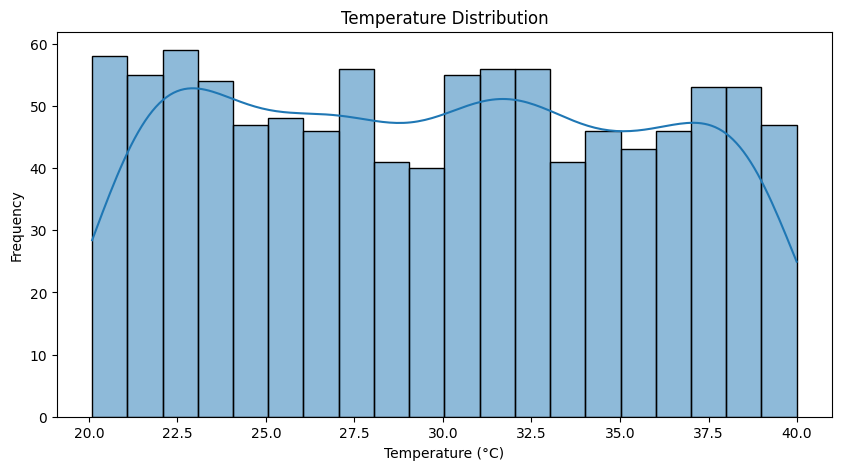

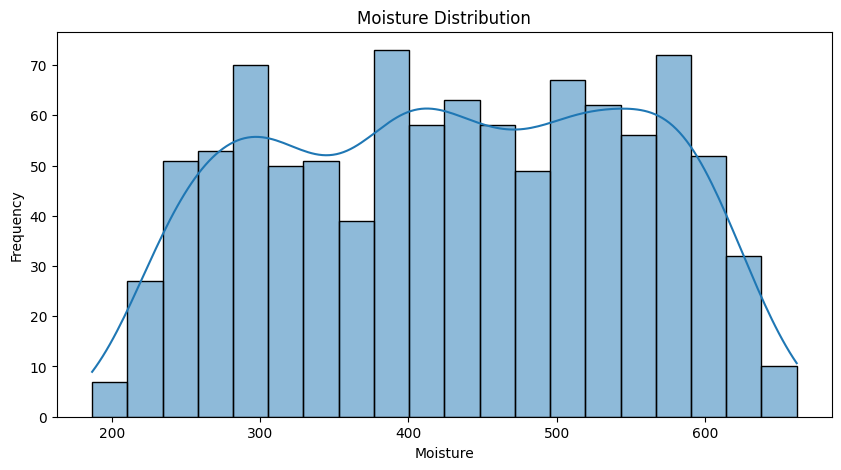


Correlation Matrix:
             temperature  moisture
temperature     1.000000 -0.986214
moisture       -0.986214  1.000000


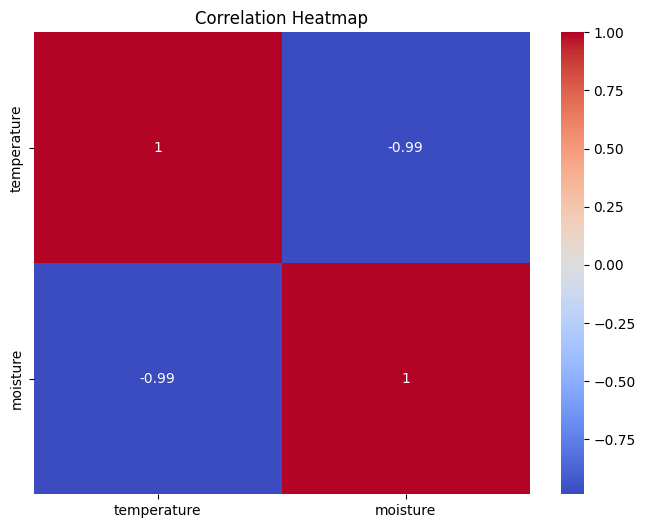

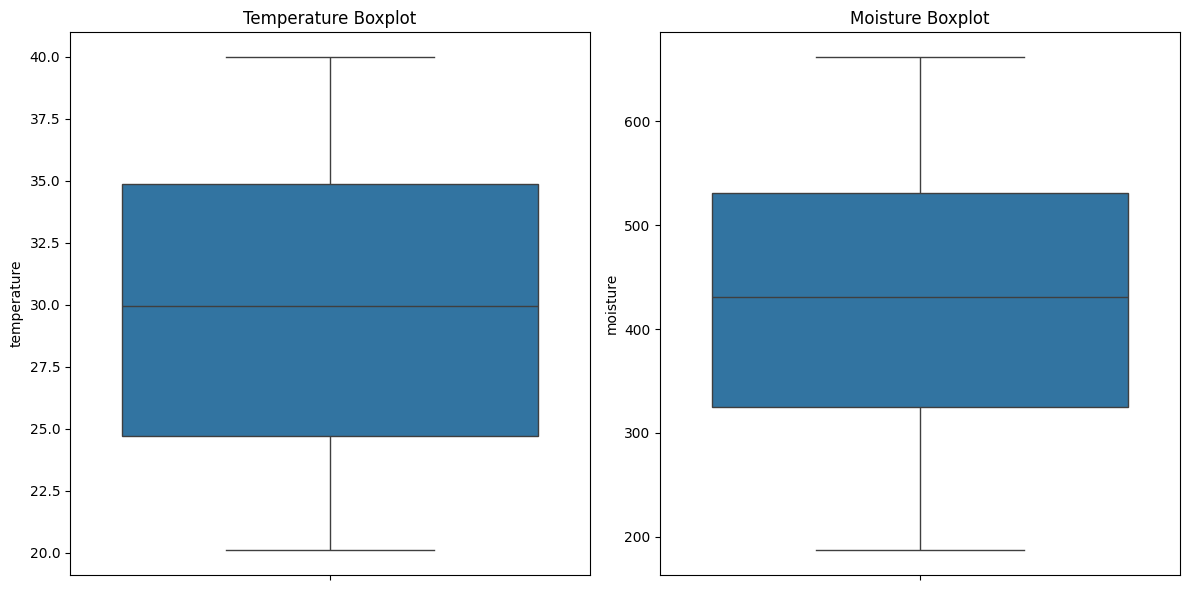


Time column converted to datetime.

Number of Duplicate Rows: 0
After Removing Duplicates: (1000, 3)

Number of Outliers in Moisture: 0
After Removing Outliers: (1000, 3)

Cleaned dataset saved as 'cleaned_dataset.csv'.


In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Dataset/synthetic_temperature_moisture.csv')  # Replace with your file path

# 1. Basic Info and Inspection
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows:")
print(data.head())

print("\nData Types:")
print(data.dtypes)

# 2. Missing Values Check
print("\nMissing Values:")
print(data.isnull().sum())

# 3. Unique Values and Variance Analysis
print("\nUnique Values in Each Column:")
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"{column}: {unique_values} unique values")

print("\nVariance of Numerical Columns:")
print(data.var(numeric_only=True))

# 4. Statistical Summary
print("\nStatistical Summary:")
print(data.describe())

# 5. Analyzing Data Distribution
plt.figure(figsize=(10, 5))
plt.title('Temperature Distribution')
sns.histplot(data['temperature'], bins=20, kde=True)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Moisture Distribution')
sns.histplot(data['moisture'], bins=20, kde=True)
plt.xlabel('Moisture')
plt.ylabel('Frequency')
plt.show()

# 6. Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = data[['temperature', 'moisture']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 7. Outlier Detection using Boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data['temperature'])
plt.title('Temperature Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(data['moisture'])
plt.title('Moisture Boxplot')

plt.tight_layout()
plt.show()

# 8. Data Cleaning and Transformation
# Convert 'time' to datetime format
try:
    data['time'] = pd.to_datetime(data['time'])
    print("\nTime column converted to datetime.")
except Exception as e:
    print("\nError converting time column:", e)

# Handling Duplicate Rows
duplicate_count = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")
data = data.drop_duplicates()
print(f"After Removing Duplicates: {data.shape}")

# Handling Outliers using IQR
Q1 = data['moisture'].quantile(0.25)
Q3 = data['moisture'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['moisture'] < lower_bound) | (data['moisture'] > upper_bound)]
print(f"\nNumber of Outliers in Moisture: {len(outliers)}")

# Removing outliers
data = data[(data['moisture'] >= lower_bound) & (data['moisture'] <= upper_bound)]
print(f"After Removing Outliers: {data.shape}")

# Save the cleaned dataset
data.to_csv('Dataset/cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'.")


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('Dataset/cleaned_dataset.csv')

# Drop rows with missing values
data = data.dropna()

# Display dataset information
print("Dataset shape:", data.shape)
data

Dataset shape: (1000, 3)


,time,temperature,moisture
0,2025-01-01 00:00:00,27.49,477.75
1,2025-01-01 01:00:00,39.01,217.09
2,2025-01-01 02:00:00,34.64,338.80
3,2025-01-01 03:00:00,31.97,396.81
4,2025-01-01 04:00:00,23.12,572.80
...,...,...,...
995,2025-02-11 11:00:00,21.83,561.00
996,2025-02-11 12:00:00,38.35,244.76
997,2025-02-11 13:00:00,22.74,568.46
998,2025-02-11 14:00:00,39.00,235.41


In [8]:
# Preprocess data
data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')
data['moisture'] = pd.to_numeric(data['moisture'], errors='coerce')
data = data.dropna()
data

,time,temperature,moisture
0,2025-01-01 00:00:00,27.49,477.75
1,2025-01-01 01:00:00,39.01,217.09
2,2025-01-01 02:00:00,34.64,338.80
3,2025-01-01 03:00:00,31.97,396.81
4,2025-01-01 04:00:00,23.12,572.80
...,...,...,...
995,2025-02-11 11:00:00,21.83,561.00
996,2025-02-11 12:00:00,38.35,244.76
997,2025-02-11 13:00:00,22.74,568.46
998,2025-02-11 14:00:00,39.00,235.41


In [9]:
# Define features and target variable
X = data[['temperature']].values  # Features
y = data['moisture'].values       # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 97.51%


In [11]:
import joblib
# Save the model for future use
joblib.dump(model, 'Model/model.pkl')

['Model/model.pkl']

In [12]:
# Export model to Arduino-compatible C code
from micromlgen import port
import re

# Generate the model as Arduino-compatible C code
c_code = port(model, class_name="MoisturePredictor")

# Fix the generated model to remove unsupported headers
c_code = c_code.replace('#include <cstdarg>', '')
c_code = c_code.replace('#include <cmath>', '')

# Fix the function declaration if using a namespace or class
# Ensure it uses a plain function definition instead of a class or namespace
c_code = re.sub(r'namespace \w+ {', '', c_code)  # Remove namespace
c_code = c_code.replace('}', '')  # Remove closing bracket of namespace
c_code = re.sub(r'class \w+ {', '', c_code)  # Remove class declaration
c_code = c_code.replace('public:', '')  # Remove public keyword

# Extract the coefficient from the generated code
match = re.search(r'return dot\(x, ([-+]?[0-9]*\.?[0-9]+(?:[eE][-+]?[0-9]+)?)\) \+ ([-+]?[0-9]*\.?[0-9]+);', c_code)
if match:
    coef = match.group(1)
    intercept = match.group(2)
else:
    coef = "-0.000000138013"  # Fallback value
    intercept = "793.3811419373237"

# Create the desired output format directly
desired_c_code = f"""#pragma once

/**
 * Compute dot product
 */
float dot(float *x, float coef) {{
    float dot = 0.0;
    dot += x[0] * coef;
    return dot;
}}

/**
 * Predict class for features vector
 */
float predict(float *x) {{
    return dot(x, {coef}) + {intercept};
}}
"""

# Save the corrected model to model.h
with open("Model/model.h", "w") as f:
    f.write(desired_c_code)

print("Fixed model.h file generated.")


Fixed model.h file generated.
